## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    keras.backend.clear_session()
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
SAVEBEST = [False, True]

In [11]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint


results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for savebest in SAVEBEST:
    checkpoint = ModelCheckpoint(filepath='./temp%d.h5'%savebest, save_best_only=savebest, monitor="val_loss")
    model = build_mlp(input_shape=x_train.shape[1:])
    opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[checkpoint])

    exp_msg = 'exp_save_%d' % savebest
    results[exp_msg] = {'loss': model.history.history['loss'],
                       'val_loss': model.history.history['val_loss'],
                       'accuracy': model.history.history['accuracy'],
                       'val_accuracy': model.history.history['val_accuracy']}
    


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7798 - accuracy: 0.3850 - val_loss: 2.4986 - val_accuracy: 0.1966
Epoch 2/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4968 - accuracy: 0.4712 - val_loss: 1.7999 - val_accuracy: 0.3521
Epoch 3/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.3959 - accuracy: 0.5081 - val_loss: 1.8953 - val_accuracy: 0.3538
Epoch 4/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.3238 - accuracy: 0.5335 - val_loss: 1.8267 - val_accuracy: 0.3610
Epoch 5/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.2601 - accuracy: 0.5549 - val_loss: 1.7102 - val_accuracy: 0.4074
Epoch 6/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.1971 - accuracy: 0.5788 - val_loss: 1.8957 - val_accuracy: 0.3554
Epoch 7/50
50000/50000 [==============================] - 2s 50us/st

Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.1924 - accuracy: 0.5805 - val_loss: 1.7043 - val_accuracy: 0.3994
Epoch 7/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1446 - accuracy: 0.5978 - val_loss: 1.7733 - val_accuracy: 0.3934
Epoch 8/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.0992 - accuracy: 0.6124 - val_loss: 1.6658 - val_accuracy: 0.4118
Epoch 9/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.0514 - accuracy: 0.6304 - val_loss: 2.2831 - val_accuracy: 0.3197
Epoch 10/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.0117 - accuracy: 0.6473 - val_loss: 1.9967 - val_accuracy: 0.3598
Epoch 11/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9641 - accuracy: 0.6613 - val_loss: 1.7153 - val_accuracy: 0.4312
Epoch 12/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9296 - accuracy: 0.6758 - val_loss

10000/10000 [==============================] - 1s 113us/step


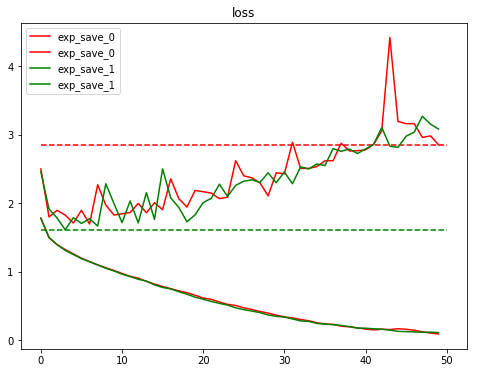

10000/10000 [==============================] - 1s 110us/step


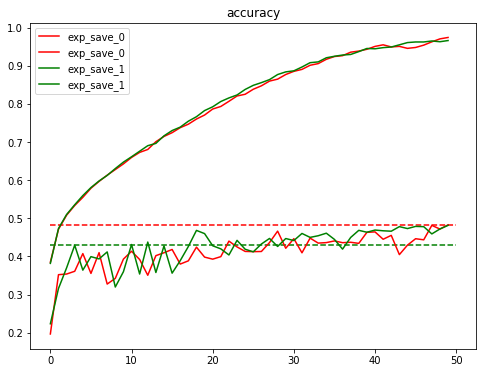

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['loss'])), results[cond]['loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '-', label=cond, color=color_bar[i])
    
    # Load back
    model = keras.models.load_model('./temp%d.h5'%i)
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    plt.hlines(y=loss_loadback, xmin=0, xmax=len(results[cond]['loss']), color=color_bar[i], linestyles='--')
plt.title('loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['accuracy'])), results[cond]['accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_accuracy'])), results[cond]['val_accuracy'], '-', label=cond, color=color_bar[i])
    
    # Load back
    model = keras.models.load_model('./temp%d.h5'%i)
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    plt.hlines(y=acc_loadback, xmin=0, xmax=len(results[cond]['loss']), color=color_bar[i], linestyles='--')
plt.title('accuracy')
plt.legend()
plt.show()